In [27]:
# loading installed r package
library(dplyr)
library(tidyverse)
library(readr)
#library(skimr)
#library(tableone)
library(car)

In [3]:
# 2: read data
lc = "../SMC/smc_bmi_dm.csv"
data = read.csv(lc, header = TRUE)
head(data)

,id,date,age,sex,bmi,height,weight,wc,fbs,hba1c,smk_status,alc_status,alc_amount_grams,egfr,visit
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,2004-03-30,30,2,19.83515,163.0,52.7,NA,90,4.7,1,1,888.00000,100.77025,1
2,1,2005-05-19,31,2,20.07734,164.0,54.0,73,83,5.1,1,1,888.00000,84.33963,2
3,1,2008-02-05,34,2,19.77324,163.1,52.6,NA,77,5.1,NA,NA,NA,82.58086,3
4,1,2009-03-19,35,2,20.51189,163.6,54.9,NA,84,5.3,1,3,90.51425,87.80133,4
5,1,2010-04-08,36,2,19.56213,164.6,53.0,NA,91,5.7,NA,NA,NA,99.65330,5
6,1,2011-03-30,37,2,20.06698,164.8,54.5,NA,100,5.4,NA,NA,NA,97.42397,6


In [16]:
# modify the data set 
data$id <- as.character(data$id)
head(data)

bmi_dm <- data %>% filter(visit==1 & !is.na(bmi)& !is.na(fbs))
summary (bmi_dm)

,id,date,age,sex,bmi,height,weight,wc,fbs,hba1c,smk_status,alc_status,alc_amount_grams,egfr,visit
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,2004-03-30,30,2,19.83515,163.0,52.7,NA,90,4.7,1,1,888.00000,100.77025,1
2,1,2005-05-19,31,2,20.07734,164.0,54.0,73,83,5.1,1,1,888.00000,84.33963,2
3,1,2008-02-05,34,2,19.77324,163.1,52.6,NA,77,5.1,NA,NA,NA,82.58086,3
4,1,2009-03-19,35,2,20.51189,163.6,54.9,NA,84,5.3,1,3,90.51425,87.80133,4
5,1,2010-04-08,36,2,19.56213,164.6,53.0,NA,91,5.7,NA,NA,NA,99.65330,5
6,1,2011-03-30,37,2,20.06698,164.8,54.5,NA,100,5.4,NA,NA,NA,97.42397,6


      id                date                age              sex       
 Length:159609      Length:159609      Min.   : 20.00   Min.   :1.000  
 Class :character   Class :character   1st Qu.: 42.00   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median : 49.00   Median :1.000  
                                       Mean   : 48.61   Mean   :1.465  
                                       3rd Qu.: 56.00   3rd Qu.:2.000  
                                       Max.   :129.00   Max.   :2.000  
                                                                       
      bmi            height          weight             wc        
 Min.   :10.66   Min.   :124.9   Min.   : 24.30   Min.   : 40.00  
 1st Qu.:21.49   1st Qu.:158.8   1st Qu.: 55.70   1st Qu.: 75.00  
 Median :23.52   Median :165.0   Median : 63.90   Median : 82.00  
 Mean   :23.65   Mean   :165.1   Mean   : 64.79   Mean   : 82.21  
 3rd Qu.:25.57   3rd Qu.:171.3   3rd Qu.: 72.60   3rd Qu.: 89.00  
 Max.   :53.69   Max. 

In [17]:
# 3: generate new variables

bmi_dm$dm <- ifelse(bmi_dm$fbs >=126, 1,0)
table(bmi_dm$dm, useNA = "ifany")


bmi_dm$bmi_cat <- ifelse(bmi_dm$bmi <18.5, 1, 
                         ifelse(bmi_dm$bmi >=18.5 & bmi_dm$bmi <23, 2,
                                ifelse(bmi_dm$bmi>=23 & bmi_dm$bmi <25 , 3, 4)))
table(bmi_dm$bmi_cat, useNA = "ifany")


     0      1 
152514   7095 


    1     2     3     4 
 6045 62747 41093 49724 


Call:
glm(formula = dm ~ bmi, family = "binomial", data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8127  -0.3251  -0.2779  -0.2355   3.0234  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.80463    0.08847  -76.91   <2e-16 ***
bmi          0.15335    0.00349   43.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 56221  on 159607  degrees of freedom
AIC: 56225

Number of Fisher Scoring iterations: 6


(Intercept)         bmi 
0.001108633 1.165727223

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.0009320107,0.001318394
bmi,1.1577760342,1.173723917


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.001108633,0.0009320107,0.001318394
bmi,1.165727223,1.1577760342,1.173723917


id,dm,pred_dm,bmi
<chr>,<dbl>,<dbl>,<dbl>
1,0,0.02268723,19.83515
2,0,0.07002469,27.50865
3,1,0.04177301,23.94464
4,0,0.04363959,24.24242
5,0,0.02126852,19.40458
6,0,0.03002293,21.71126
7,0,0.03180646,22.09959
8,0,0.07053606,27.55969
9,0,0.02749334,21.12029


[1] "1" "2" "3" "4"


Call:
glm(formula = dm ~ bmi_cat, family = "binomial", data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3867  -0.3867  -0.3046  -0.2267   3.0485  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.6369     0.1319 -35.144  < 2e-16 ***
bmi_cat2      0.9885     0.1344   7.357 1.88e-13 ***
bmi_cat3      1.5896     0.1341  11.858  < 2e-16 ***
bmi_cat4      2.0811     0.1331  15.639  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 56408  on 159605  degrees of freedom
AIC: 56416

Number of Fisher Scoring iterations: 7


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.009687657,0.007395158,0.01241587
bmi_cat2,2.687152768,2.085909813,3.53551370
bmi_cat3,4.902028267,3.807700383,6.44610186
bmi_cat4,8.013282085,6.237386898,10.51884656



Call:
glm(formula = dm ~ relevel(bmi_cat, ref = 2), family = "binomial", 
    data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3867  -0.3867  -0.3046  -0.2267   3.0485  

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                -3.64842    0.02539 -143.713  < 2e-16 ***
relevel(bmi_cat, ref = 2)1 -0.98848    0.13436   -7.357 1.88e-13 ***
relevel(bmi_cat, ref = 2)3  0.60117    0.03474   17.306  < 2e-16 ***
relevel(bmi_cat, ref = 2)4  1.09262    0.03075   35.537  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 56408  on 159605  degrees of freedom
AIC: 56416

Number of Fisher Scoring iterations: 7


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.02603221,0.02475882,0.02734963
"relevel(bmi_cat, ref = 2)1",0.37214110,0.28284433,0.47940711
"relevel(bmi_cat, ref = 2)3",1.82424622,1.70426136,1.95290007
"relevel(bmi_cat, ref = 2)4",2.98207165,2.80826575,3.16799608


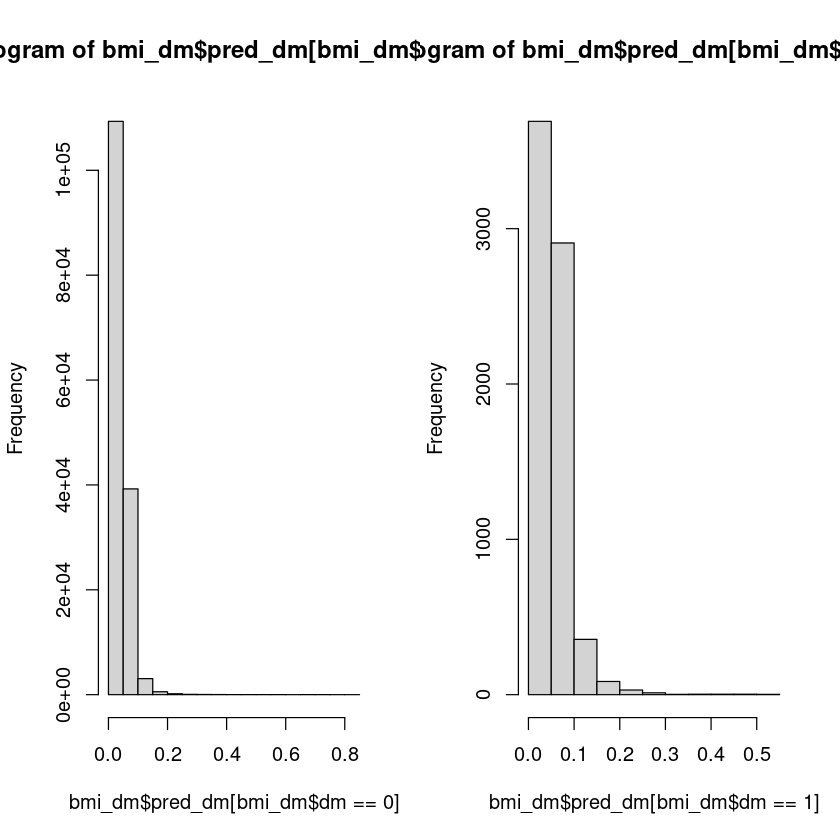

In [18]:
# 4: logistic regression
#---- univariable
#-- continuous exposure

?glm
model1<-glm(dm~bmi, family= "binomial", data=bmi_dm)
summary(model1)

exp(coef(model1))
exp(confint(model1)) #we can obatin 95%ci with odds ratio 
exp(cbind(coef(model1), confint(model1)))

bmi_dm$pred_dm <-fitted(model1) # get the prediction values from the model

bmi_dm %>% select(id, dm, pred_dm, bmi) 
par(mfrow = c(1, 2))
hist(bmi_dm$pred_dm[bmi_dm$dm==0]) 
hist(bmi_dm$pred_dm[bmi_dm$dm==1]) 

#-categorical exposure
bmi_dm$bmi_cat <-as.factor(bmi_dm$bmi_cat)
levels(bmi_dm$bmi_cat)
model2<-glm(dm~ bmi_cat , family= "binomial" , data=bmi_dm)
summary(model2)
exp(cbind(coef(model2), confint(model2)))

# reference change
model3<-glm(dm~ relevel(bmi_cat,ref=2), family= "binomial" , data=bmi_dm)
summary(model3)
exp(cbind(coef(model3), confint(model3)))

In [29]:
#---- multivariable
# multivariable logistic regression
bmi_dm$sex <-as.factor(bmi_dm$sex)

model4<-glm(dm~ bmi+age+sex , family= "binomial", data=bmi_dm)
summary(model4)
exp(cbind(coef(model4), confint(model4)))

bmi_dm$smk_status <-as.factor(bmi_dm$smk_status)
model5=glm(dm~ bmi+age+sex+smk_status, family= "binomial" , data=bmi_dm)
summary(model5)
exp(cbind(coef(model5), confint(model5)))

bmi_dm$smk_status <- as.factor(ifelse(is.na(bmi_dm$smk_status),99,bmi_dm$smk_status))
table(bmi_dm$smk_status, useNA = "ifany")

model6=glm(dm~ bmi+age+sex+smk_status, family= "binomial" , data=bmi_dm)
summary(model6)
exp(cbind(coef(model6), confint(model6)))


Call:
glm(formula = dm ~ bmi + age + sex, family = "binomial", data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5909  -0.3416  -0.2493  -0.1685   3.3924  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.975171   0.122108  -73.50   <2e-16 ***
bmi          0.134960   0.003927   34.37   <2e-16 ***
age          0.055883   0.001173   47.63   <2e-16 ***
sex2        -0.800055   0.028501  -28.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 53164  on 159605  degrees of freedom
AIC: 53172

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.0001265123,9.955293e-05,0.0001606766
bmi,1.1444909022,1.135702e+00,1.1533218400
age,1.0574738067,1.055047e+00,1.0599105175
sex2,0.4493042232,4.247973e-01,0.4750172827



Call:
glm(formula = dm ~ bmi + age + sex + smk_status, family = "binomial", 
    data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8396  -0.3418  -0.2471  -0.1656   3.3739  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -9.350512   0.126425 -73.961  < 2e-16 ***
bmi           0.134148   0.003928  34.155  < 2e-16 ***
age           0.058870   0.001209  48.709  < 2e-16 ***
sex2         -0.605297   0.035385 -17.106  < 2e-16 ***
smk_status2   0.163142   0.043823   3.723 0.000197 ***
smk_status3   0.475781   0.037476  12.695  < 2e-16 ***
smk_status99  0.158103   0.037827   4.180 2.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 52990  on 159602  degrees of freedom
AIC: 53004

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),8.692089e-05,6.781827e-05,0.0001113262
bmi,1.143562e+00,1.134779e+00,1.1523868410
age,1.060637e+00,1.058130e+00,1.0631549649
sex2,5.459125e-01,5.092916e-01,0.5850780732
smk_status2,1.177204e+00,1.080109e+00,1.2825691065
smk_status3,1.609270e+00,1.495415e+00,1.7320785386
smk_status99,1.171287e+00,1.087475e+00,1.2613145815



    1     2     3     4 
83520 15867 33695 26527 


Call:
glm(formula = dm ~ bmi + age + sex + smk_status, family = "binomial", 
    data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8396  -0.3418  -0.2471  -0.1656   3.3739  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.350512   0.126425 -73.961  < 2e-16 ***
bmi          0.134148   0.003928  34.155  < 2e-16 ***
age          0.058870   0.001209  48.709  < 2e-16 ***
sex2        -0.605297   0.035385 -17.106  < 2e-16 ***
smk_status2  0.163142   0.043823   3.723 0.000197 ***
smk_status3  0.475781   0.037476  12.695  < 2e-16 ***
smk_status4  0.158103   0.037827   4.180 2.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 52990  on 159602  degrees of freedom
AIC: 53004

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),8.692089e-05,6.781827e-05,0.0001113262
bmi,1.143562e+00,1.134779e+00,1.1523868410
age,1.060637e+00,1.058130e+00,1.0631549649
sex2,5.459125e-01,5.092916e-01,0.5850780732
smk_status2,1.177204e+00,1.080109e+00,1.2825691065
smk_status3,1.609270e+00,1.495415e+00,1.7320785386
smk_status4,1.171287e+00,1.087475e+00,1.2613145815


In [30]:
# multicollinearity test 
vif(model6)
vif(model6) > 10

# interaction 
model7=glm(dm~ bmi*sex + age , family= "binomial", data=bmi_dm)
summary(model7)
exp(cbind(coef(model7), confint(model7)))

exp(0.109662+0.073719) # ods for dm according to bmi 1 unit increasing in female 

library(multcomp)

confint(glht(model7, linfct = c("bmi + bmi:sex2 = 0 ")))
bmi_female<-confint(glht(model7, linfct = c("bmi + bmi:sex2 = 0")))
exp(bmi_female$confint)  # display the odds ratio

,GVIF,Df,GVIF^(1/(2*Df))
bmi,1.022315,1,1.011096
age,1.067071,1,1.032991
sex,1.572633,1,1.254047
smk_status,1.647827,3,1.086806


,GVIF,Df,GVIF^(1/(2*Df))
bmi,FALSE,FALSE,FALSE
age,FALSE,FALSE,FALSE
sex,FALSE,FALSE,FALSE
smk_status,FALSE,FALSE,FALSE



Call:
glm(formula = dm ~ bmi * sex + age, family = "binomial", data = bmi_dm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4954  -0.3456  -0.2530  -0.1617   3.5002  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.238901   0.147324 -55.924   <2e-16 ***
bmi          0.109662   0.004884  22.452   <2e-16 ***
sex2        -2.632543   0.209224 -12.582   <2e-16 ***
age          0.054114   0.001188  45.537   <2e-16 ***
bmi:sex2     0.073719   0.008293   8.889   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58048  on 159608  degrees of freedom
Residual deviance: 53086  on 159604  degrees of freedom
AIC: 53096

Number of Fisher Scoring iterations: 7


Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.0002641745,0.0001978599,0.0003525092
bmi,1.1159005906,1.1052510971,1.1266174470
sex2,0.0718954310,0.0477075286,0.1083409272
age,1.0556051412,1.0531514152,1.0580688061
bmi:sex2,1.0765041513,1.0591279195,1.0941262356


[1] 1.201272

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser





	 Simultaneous Confidence Intervals

Fit: glm(formula = dm ~ bmi * sex + age, family = "binomial", data = bmi_dm)

Quantile = 1.96
95% family-wise confidence level
 

Linear Hypotheses:
                    Estimate lwr    upr   
bmi + bmi:sex2 == 0 0.1834   0.1704 0.1964


,Estimate,lwr,upr
bmi + bmi:sex2,1.201272,1.185743,1.217004
